#Importing librarys#


In [26]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Importing Data and some info#


In [27]:
creditcard=pd.read_csv('creditcard.csv')
print(creditcard.head())
print(creditcard.shape)
print(creditcard.describe())
print(creditcard.info())

#using some tools to take idea for data

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

#Handilg Missing Vaues if Found#

In [28]:
missing_values = creditcard.isnull().sum()
missing_values[missing_values > 0]

,0


In [29]:
Continuous_Columns = [
  'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
           'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
           'V24', 'V25', 'V26', 'V27', 'V28']
Carde_imputed = SimpleImputer(missing_values=np.nan, strategy="mean")

creditcard[Continuous_Columns]= Carde_imputed.fit_transform(creditcard[Continuous_Columns])
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [30]:
missing_values = creditcard.isnull().sum()
missing_values[missing_values > 0]

,0


#Classes Info#

In [31]:
class_counts= creditcard['Class'].value_counts()
print(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Transaction Classes')

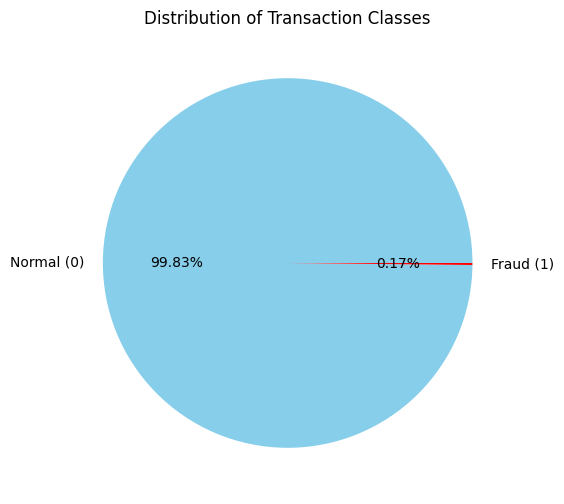

In [32]:
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=['Normal (0)', 'Fraud (1)'], autopct='%1.2f%%', colors=['skyblue', 'red'])
plt.title('Distribution of Transaction Classes')

In [33]:
# from counting the classes we can show the data has two classes the data is not balance we support this with pie plot

#Ploting pefore and after scaling#



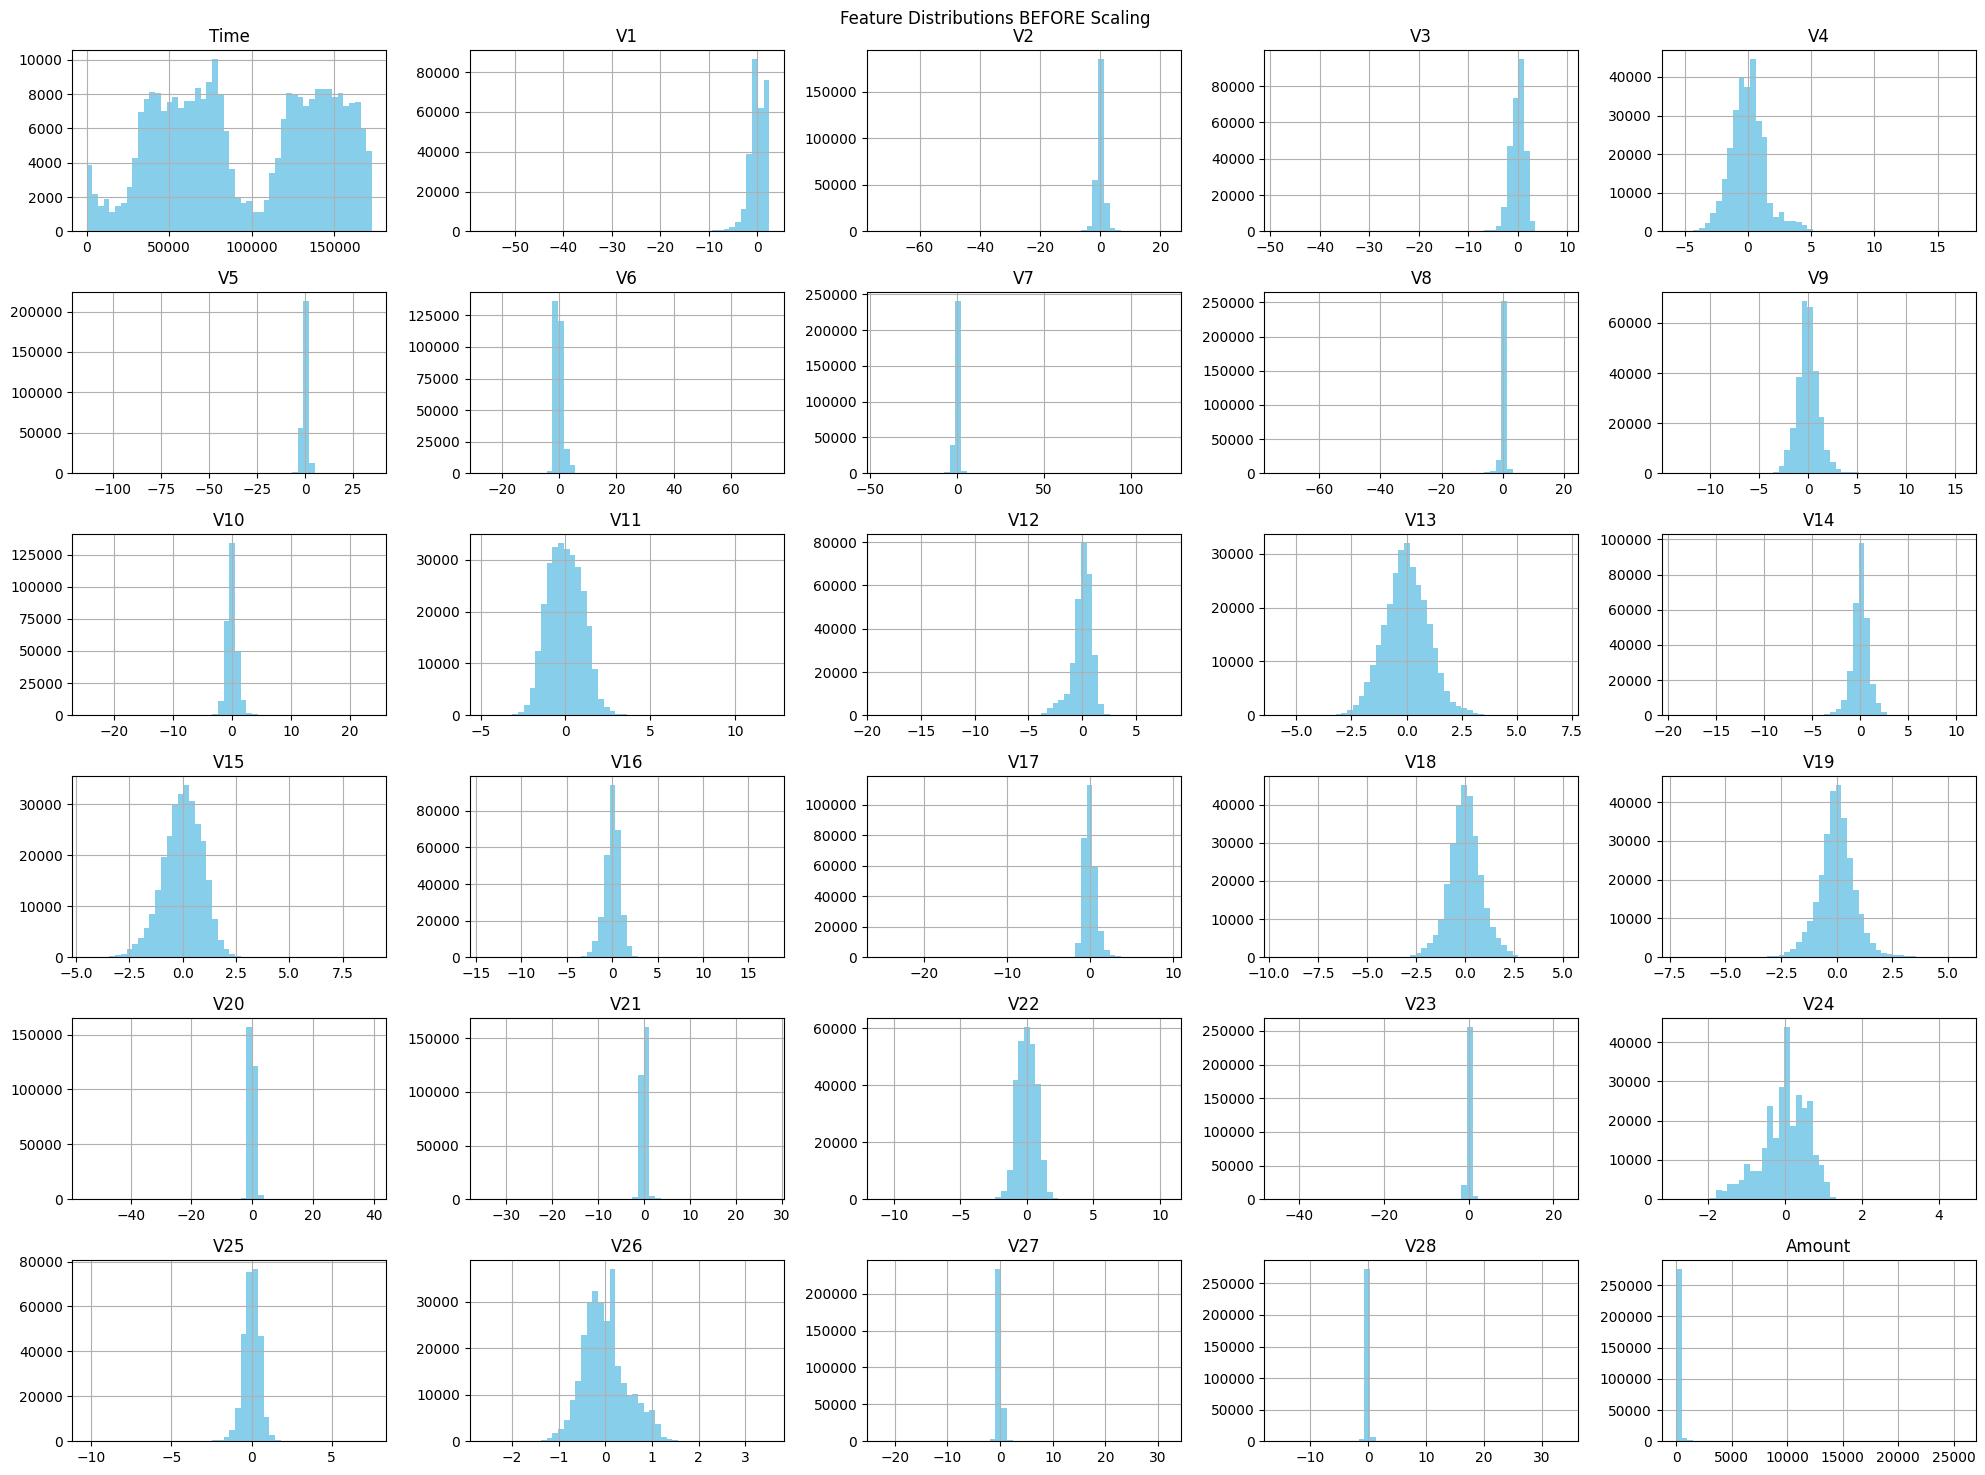

In [34]:
features = [col for col in creditcard.columns if col != 'Class']
creditcard[features].hist(bins=50, figsize=(20,15), color='skyblue')
plt.suptitle("Feature Distributions BEFORE Scaling")
plt.tight_layout()

#plot to show data befor scaling

In [35]:
Carde = creditcard.drop(columns=['Class'])
scaler = StandardScaler()
Carde_scaled = scaler.fit_transform(Carde)

#we drop column of class because if apply scaling on class the class it will be ruined
#we apply scale to all data without class we chose StandardScaler not MinMaxScaler  becuas
#It gives more accurate results in PCA and K-Means.
#It scales all features to the same variance scale, without distorting the distribution.

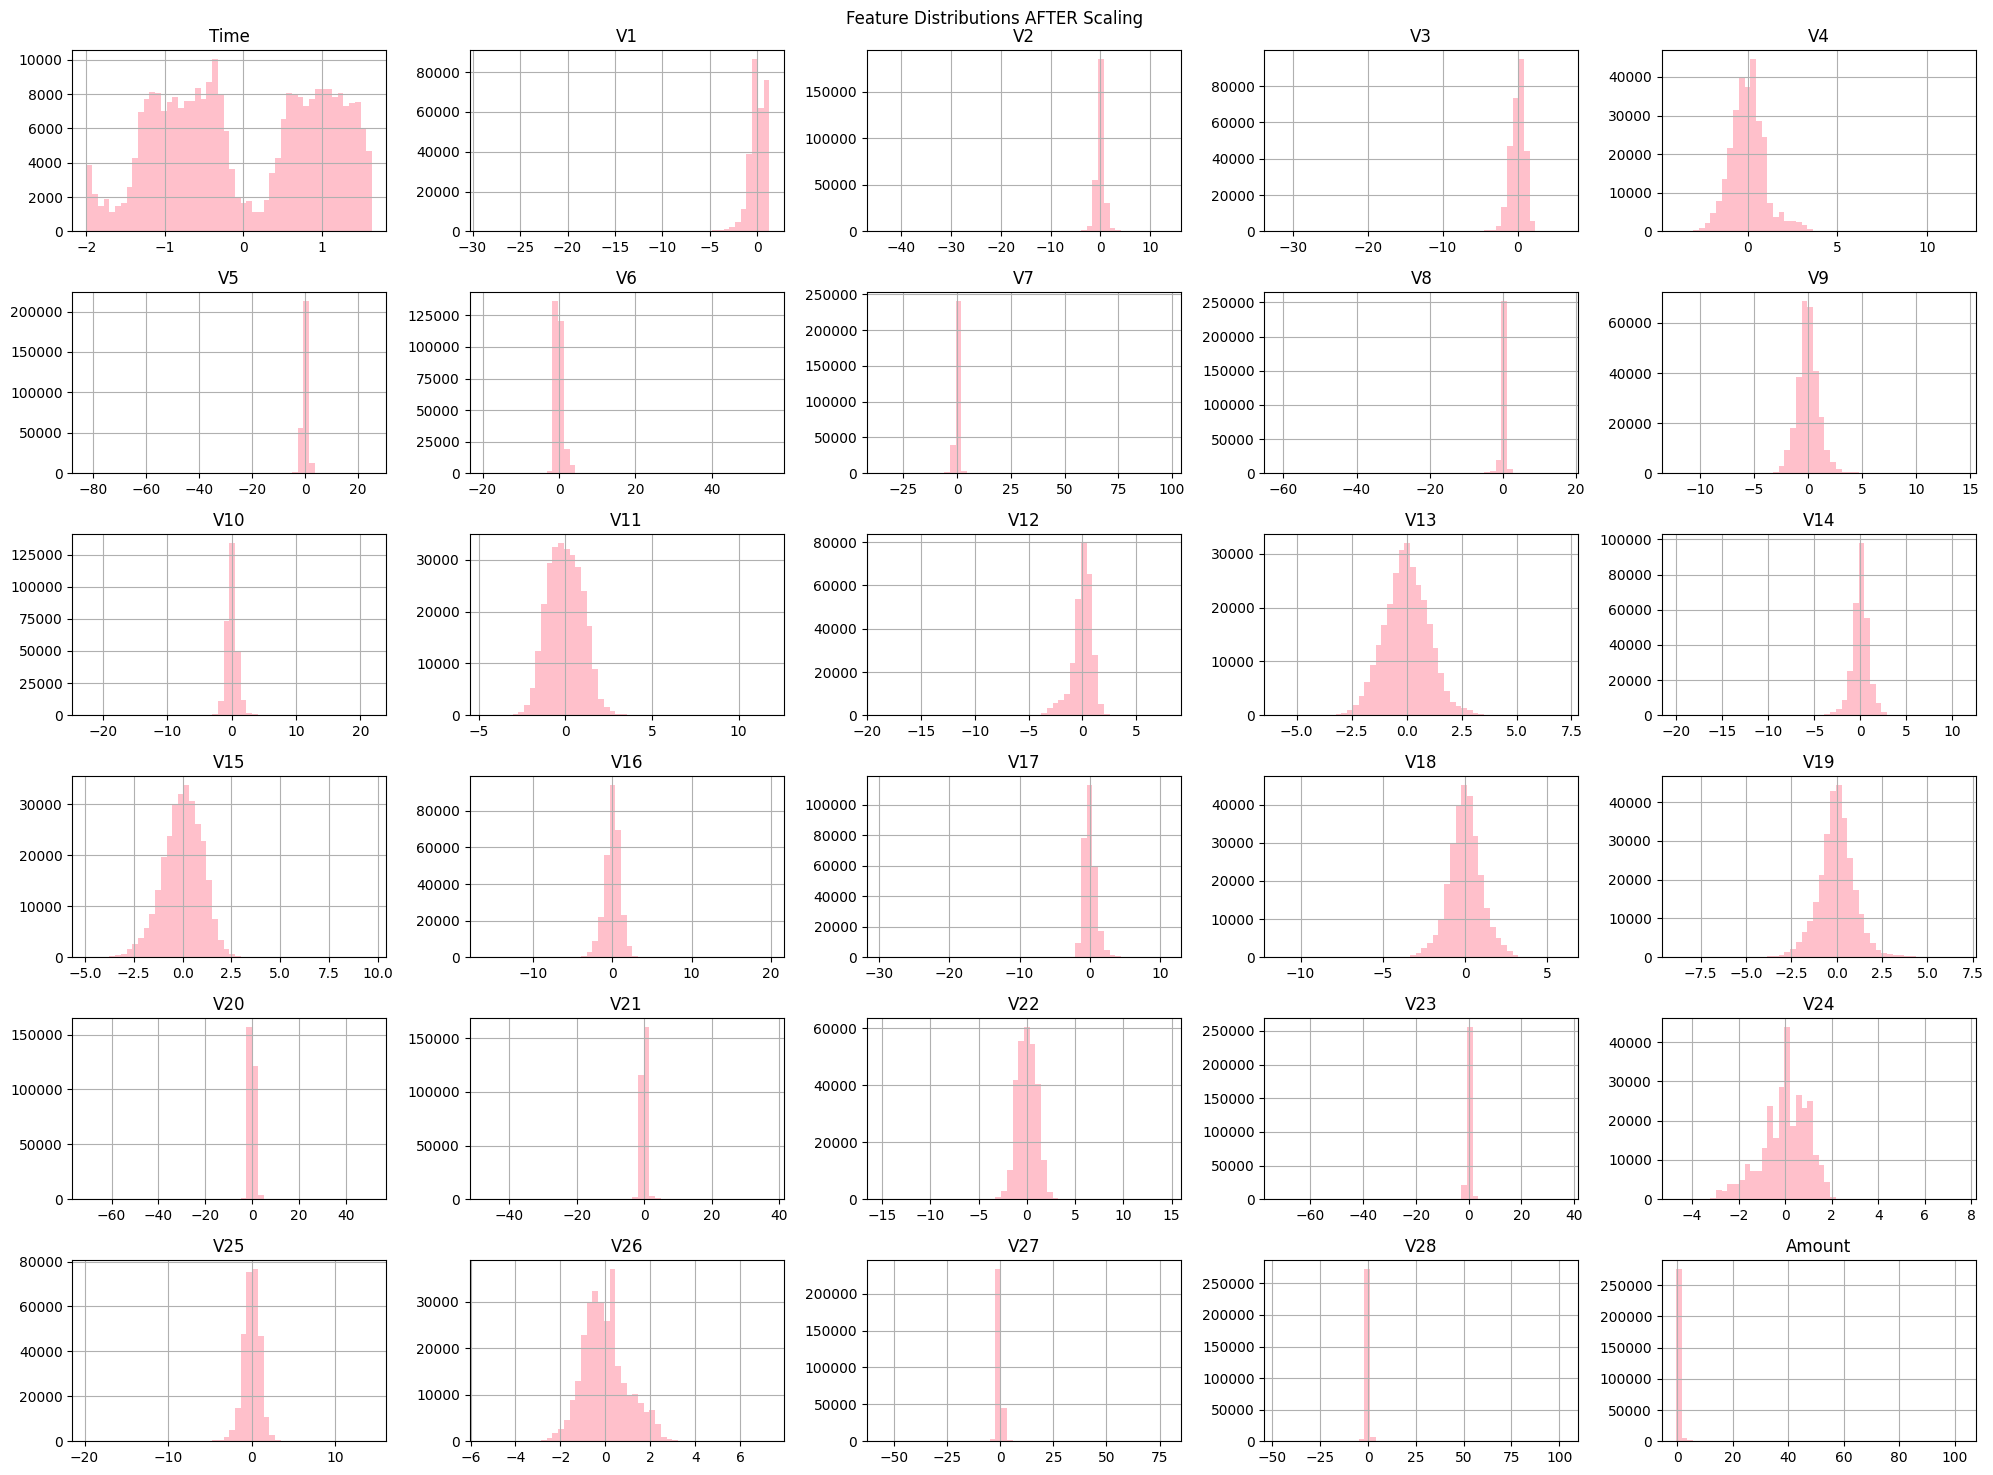

In [36]:
Carde_scaled_df = pd.DataFrame(Carde_scaled, columns=Carde.columns)
Carde_scaled_df.hist(bins=50, figsize=(20,15), color='pink')
plt.suptitle("Feature Distributions AFTER Scaling")
plt.tight_layout()

#plot to show data after scaling

In [37]:
pca = PCA()
Card_pca = pca.fit_transform(creditcard[Continuous_Columns])
Card_pca.shape

(284807, 24)

Component 1: Explained Variance = 0.0959, Cumulative = 0.0959
Component 2: Explained Variance = 0.0894, Cumulative = 0.1853
Component 3: Explained Variance = 0.0770, Cumulative = 0.2623
Component 4: Explained Variance = 0.0718, Cumulative = 0.3341
Component 5: Explained Variance = 0.0608, Cumulative = 0.3949
Component 6: Explained Variance = 0.0597, Cumulative = 0.4545
Component 7: Explained Variance = 0.0524, Cumulative = 0.5070
Component 8: Explained Variance = 0.0503, Cumulative = 0.5573
Component 9: Explained Variance = 0.0499, Cumulative = 0.6071
Component 10: Explained Variance = 0.0463, Cumulative = 0.6534
Component 11: Explained Variance = 0.0422, Cumulative = 0.6956
Component 12: Explained Variance = 0.0387, Cumulative = 0.7342
Component 13: Explained Variance = 0.0363, Cumulative = 0.7705
Component 14: Explained Variance = 0.0354, Cumulative = 0.8059
Component 15: Explained Variance = 0.0334, Cumulative = 0.8392
Component 16: Explained Variance = 0.0299, Cumulative = 0.8692
C

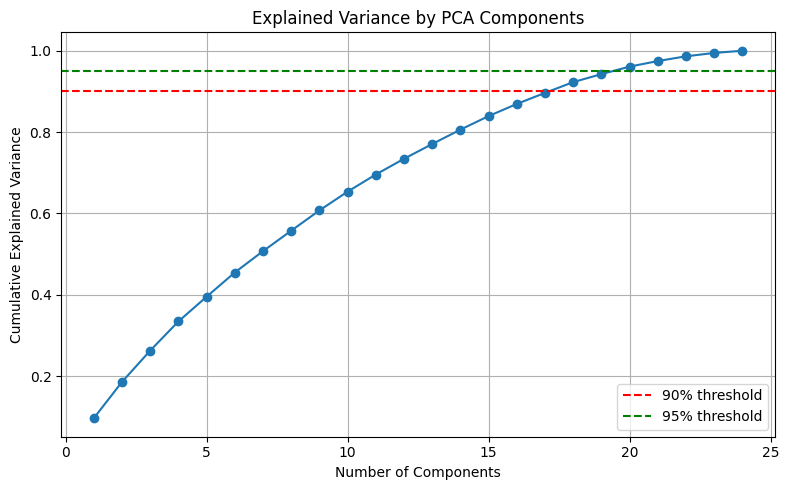

In [38]:
explained_var_ratio = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_var_ratio)

for i, (ev, cv) in enumerate(zip(explained_var_ratio, cumulative_variance), start=1):
    print(f"Component {i}: Explained Variance = {ev:.4f}, Cumulative = {cv:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% threshold')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f" 90% variance: {n_components_90}")
print(f" 95% variance: {n_components_95}")


 90% variance: 18
 95% variance: 20


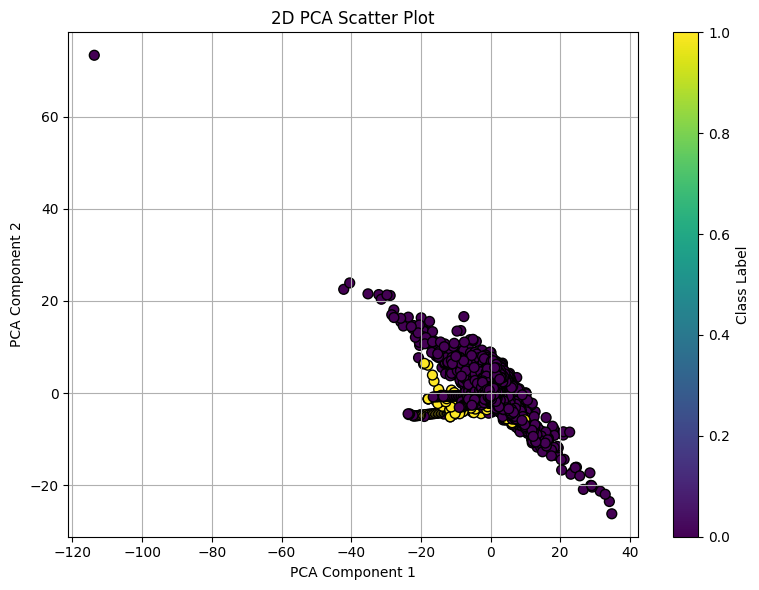

In [40]:
X_pca_2d = pca.transform(creditcard[Continuous_Columns])[:, :2]

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=creditcard['Class'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA Scatter Plot')
plt.grid(True)
plt.colorbar(label='Class Label')
plt.tight_layout()
plt.show()